In [1]:
import visual_genome.local as vg
from tqdm import tqdm
import matplotlib.pyplot as plt
 
# DATA_PATH = '/local/home/stuff/visual-genome/'
LOCAL_DATA_PATH = '/local/home/jthomm/visual-genome/'

In [2]:
import json
# you need to download the scene graph data from visual genome, it's not included in dario's folder (and i don't have write access there)
with open(LOCAL_DATA_PATH+'scene_graphs.json', 'r') as f:
    scene_graphs_dict = json.load(f)

In [3]:
import networkx as nx

def build_graph(g_dict):
        G = nx.DiGraph(image_id=g_dict['image_id'])
        G.labels = {}
        for obj in g_dict['objects']:
            G.add_node(obj['object_id'], w=obj['w'], h=obj['h'], x=obj['x'], y=obj['y'], attributes=obj.get('attributes',[]), name=obj['names'][0])
            G.labels[obj['object_id']] = obj['names'][0]
        for rel in g_dict['relationships']:
            G.add_edge(rel['subject_id'], rel['object_id'], synsets=rel['synsets'] ,relationship_id=rel['relationship_id'], predicate=rel['predicate'])
        return G
    

In [4]:
graphs = [] 
for g_dict in tqdm(scene_graphs_dict):
    graphs.append(build_graph(g_dict))

100%|██████████| 108077/108077 [00:24<00:00, 4465.73it/s]


In [5]:
# access of node attributes
print(graphs[0].nodes[1058525]['w'])
# access of edge attributes
print(graphs[0].edges[(5045,5046)]['predicate'])
# iterate over edges
print(list(graphs[0].edges)[0])

46
ON
(5045, 5046)


In [11]:
def plot_graph(g):
    plt.figure(figsize=(30,5))
    pos = nx.nx_agraph.graphviz_layout(g, prog="dot")
    nx.draw(g,pos=pos,labels=g.labels, with_labels=True, node_size=10, node_color="lightgray", font_size=8)
    nx.draw_networkx_edge_labels(g,pos=pos,edge_labels=nx.get_edge_attributes(g,'predicate'),font_size=8)
    plt.show()

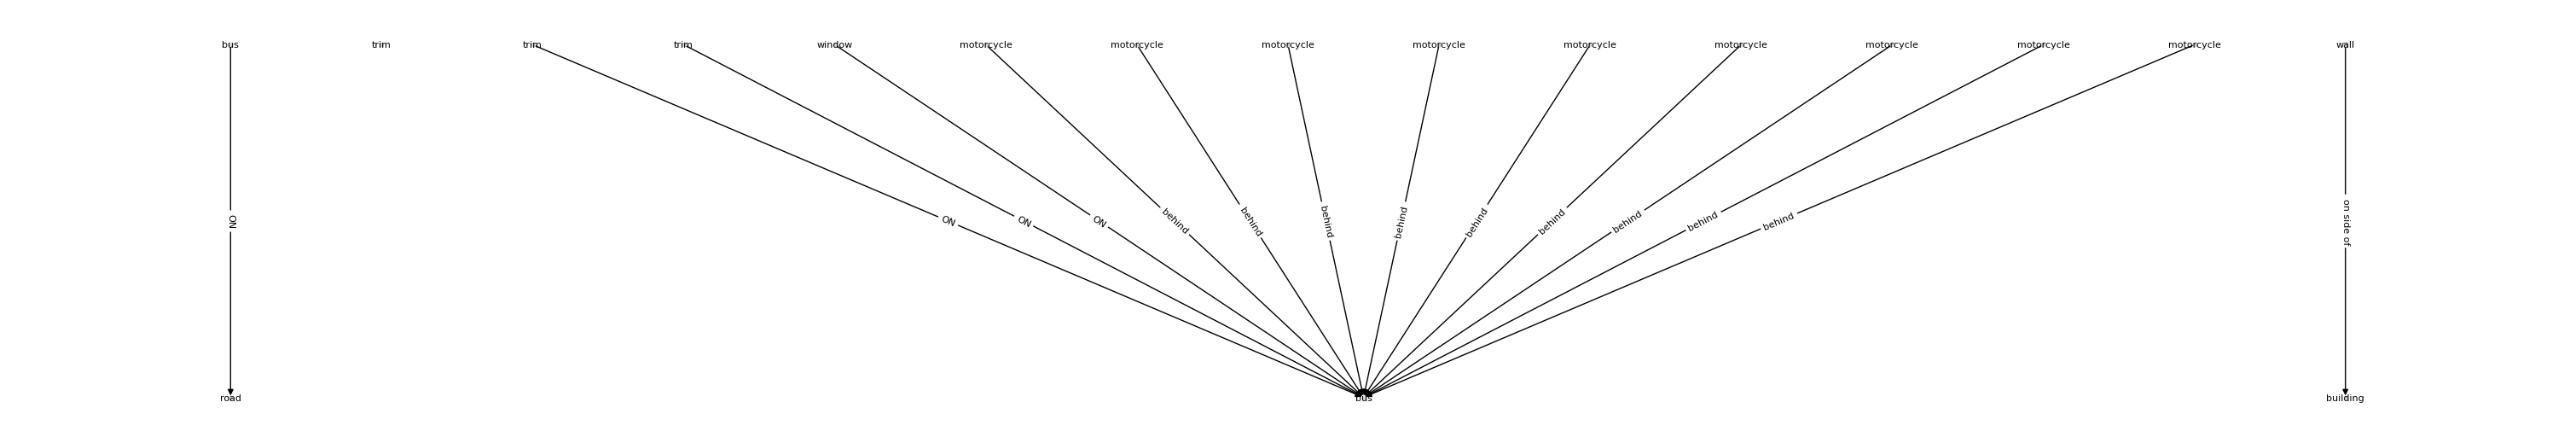

In [15]:
import random
plot_graph(graphs[random.randint(0,len(graphs))])